In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ============= PART 1PART 1: READING AND PADDING THE IMAGE =====================
    
def countBlobs(im):

  #    countBlobs Counts the number of blobs: connected regions of positive
  #               values - and labels them.
  #   returns:    number of blobs

  # Get dimensions
  h, w = im.shape
  # Pad the image with a border of 1
  im = np.pad(im, 1)
  # labels
  tag = 1
  # hashmap
  hash = {}
  # ============= PART 2: FIRST PASS ========================================

  for row in range(1, h+1):
      for col in range(1, w+1):

          # Current pixel is of interest - change 255 to 1 if it's binary.
          if im[row, col] == 255:

              neighbours = np.array([im[row, col - 1], im[row - 1, col - 1], im[row - 1, col], im[row - 1, col + 1]])
              # all neighbours are zero: new component
              # if nnz(neighbours) == 0 del
              if np.count_nonzero(neighbours) == 0:
                  im[row, col] = tag;  # give it a label
                  tag = tag + 1;  # increment label

              elif np.count_nonzero(neighbours) == 1:
                  index = int(np.nonzero(neighbours)[0]) + 1 
                  im[row, col] = neighbours[index - 1]  # set current pixels to neighbour's label

              # more than one neighbour is non-zero - tricky part
              else:
                  # get non-zero indexes;
                  indices = np.nonzero(neighbours)[0] + 1
                  # set it to a label of the lowest number
                  temp = np.copy(neighbours[indices - 1]) 
                  l = int(np.amin(temp))

                  im[row, col] = l;

                  # record equivalence classes
                  for i in range(1, indices.size+1):
                      templ = int(neighbours[indices[i - 1] - 1])

                      s = l

                      if templ != l:  # we only look at differing labels - e.g. 2->2 is not helpful
                          if s in hash:
                              hash[int(s)] = np.array(hash(s), templ)
                              hash[int(s)] = np.unique(hash[s])
                          else:
                              hash[int(s)] = templ;

  # ============= PART 3: RESTRUCTURE HASHMAP ===============================

  # Handle equivalences: restructure hashmap so that no key is a value and no
  # values is a key. Basically we don't want: 12->13 and 13->14-15. We want
  # % it like 12->14-15.
  array = np.array([])
  for k in hash.keys():

      if k in hash:

          thekey = k
          array = np.append(array, hash[thekey]) ###

          x = 1;
          leng = len(array)

          # loop over current value array
          while x <= leng:
              # current value at index x
              cur = array[x-1];

              # see if value is its own key. E.g. 12->13 and also 13->14-15. The value 13 is also a key somewhere else.
              if cur in hash:

                  # get value array of that key
                  array2 = hash(cur);

                  # put all those values in current value array. Create 12->14-15
                  array = np.append(array, array2)

                  # update hashmap
                  hash[thekey] = array;

                  # update while loop stats
                  x = 1;
                  leng = len(array);

                  # remove this key
                  hash.pop(cur, None)
              else:
                  x = x + 1;

  newhash = {}

  varray = np.array([])
  for k in hash.keys():
      varray = np.append(varray,hash[k])
      print('test')
      for i in range(1):
          newhash[varray[i]] = k


  # ============= PART 4: REMOVE PADDING ====================================

  # Remove padding from image
  im = im[1:h + 1, 1:w + 1];

  # % ============= PART 5: SECOND PASS =======================================

  # SECOND PASS - Relabel whole image
  for row in range(h):
      for col in range(w):
          p = im[row, col];
          if p in newhash:
              im[row, col] = newhash[p];  # set proper label 
   
  
  count = len(np.unique(im)) - 1;  # zero is not a label so: minus 1
  return count, im

  # end

In [3]:
# Create a image
img = np.zeros((5,5))
img[0,4] = 255;

img[1,1] = 255;
img[2,0] = 255;

img[2,3] = 255;
img[2,4] = 255;
img[3,3] = 255;
img[4,3]= 255;
img[4,1] = 255;
img[4,2] = 255;
img[4,3] = 255;

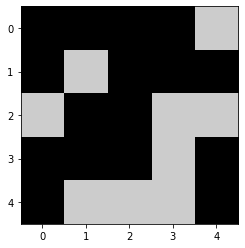

In [4]:
plt.imshow(img, cmap='nipy_spectral')

test
NBlobs:  3


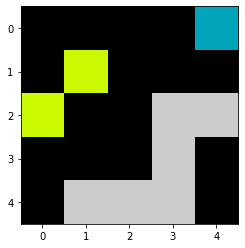

In [5]:
nBlobs, ims = countBlobs(img);
print('NBlobs: ', nBlobs)
plt.imshow(ims, cmap='nipy_spectral')